In [377]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [378]:
#Build Bayesian Network
bn=gum.BayesNet()

In [379]:
#Add nodes
HD = bn.add(gum.LabelizedVariable('Heart_Disease','Heart_Disease',0).addLabel('No').addLabel('Yes'))
CPT = bn.add(gum.LabelizedVariable('Chest_Pain_Type','Chest_Pain_Type',0).addLabel('ASY').addLabel('ATA').addLabel('NAP').addLabel('TA'))
STSlope = bn.add(gum.LabelizedVariable('ST_Slope','Slope of peak exercise ST segment',0).addLabel("Down").addLabel("Flat").addLabel("Up"))
diabetic = bn.add(gum.LabelizedVariable('Diabetic','Fasting Blood Sugar',0).addLabel("No").addLabel("Yes"))
ExAngina = bn.add(gum.LabelizedVariable('Exercise_Angina','Exercise induce Angina',0).addLabel("No").addLabel("Yes"))
age = bn.add(gum.LabelizedVariable('Age','Patient Age Range in Years',0).addLabel("20s").addLabel("30s").addLabel("40s").addLabel("50s").addLabel("60s").addLabel("70s"))
RBP = bn.add(gum.LabelizedVariable('Resting_BP','Resting blood pressure',0).addLabel("Normal").addLabel("Elevated").addLabel("High").addLabel("Extreme"))
cholesterol = bn.add(gum.LabelizedVariable('Cholesterol','Cholesterol Categories',0).addLabel("LT200").addLabel("BET200-239").addLabel("GT240"))

In [380]:
#Add Arcs
bn.addArc(cholesterol,HD)
bn.addArc(diabetic,HD)
bn.addArc(age,RBP)
bn.addArc(age,STSlope)
bn.addArc(STSlope,ExAngina)
bn.addArc(ExAngina,CPT)
bn.addArc(RBP,HD)

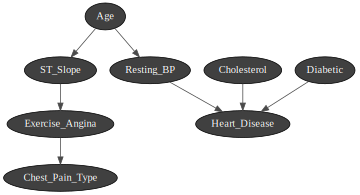

In [381]:
gnb.showBN(bn)

In [382]:
#Build Conditional Probability Table
bn.cpt(age).fillWith([0.007092,0.086879,0.246454,0.413121,0.210993,0.035461])
bn.cpt(STSlope)[:]=[[0.100000,0.250000,0.650000],[0.040816,0.346939,0.612245],[0.028777,	0.424460,	0.546763],[0.064378,	0.510730,	0.424893],[0.092437,	0.655462,	0.252101],[0.300000,	0.550000,	0.150000]]
bn.cpt(RBP)[:]=[[0.5,	0.250000,	0.125000,	0.125000],[0.285714,	0.346939,	0.163265,	0.204082],[0.223022,	0.244604,	0.237410,	0.294964],[0.103004,	0.240343,	0.248927,	0.407725],[0.100840,	0.176471,	0.235294,	0.487395],[0.050000,	0.150000,	0.150000,	0.650000]]
bn.cpt(CPT)[:]=[[0.340694,	0.302839,	0.274448,	0.082019],[0.809717,	0.044534,	0.121457,	0.024291]]
bn.cpt(ExAngina)[:]=[[0.315789,	0.684211],[0.348592,	0.651408],[0.851240,	0.148760]]
bn.cpt(diabetic).fillWith([0.812057, 0.187943])
bn.cpt(cholesterol).fillWith([0.203901,	0.342199,	0.453901])
bn.cpt(HD)[:]=[[[[0.750000,	0.250000],[0.620690,	0.379310],[0.354839,	0.645161]],[[0.673000,	0.327000],[0.550800,	0.449200],[0.250000,	0.750000]]],[[[0.629630,	0.370370],[0.529412,	0.470588],[0.436364,	0.563636]],[[0.555556,  0.444444],[0.444444,	0.555556],[0.428571,	0.571429]]],[[[0.608696,	0.391304],[0.571429,	0.428571],[0.500000,	0.500000]],[[0.400000,	0.600000],[0.222222,	0.777778],[0.200000,	0.800000]]],[[[0.529412,	0.470588],[0.360000,	0.640000],[0.362500,	0.637500]],[[0.444444,	0.555556],[0.312500,	0.687500],[0.206897,	0.793103]]]]

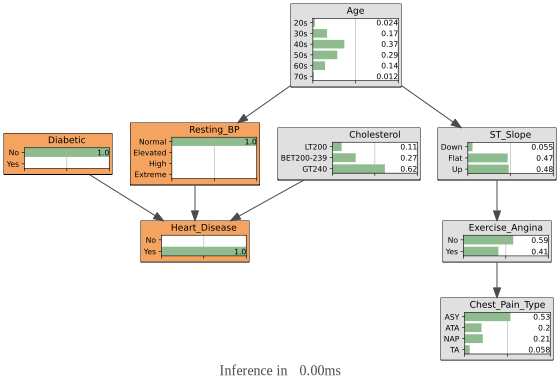

In [383]:
#Make Inference by Variable Elimination
ve=gum.VariableElimination(bn)
gnb.showInference(bn,evs={'Heart_Disease':'Yes', 'Resting_BP':'Normal', 'Diabetic':'No'}, engine=ve)

In [384]:
ve.posterior('Cholesterol')[2]

0.6183078161843742

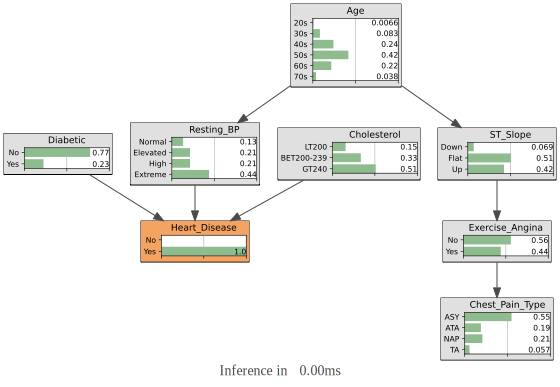

In [385]:
gnb.showInference(bn,evs={'Heart_Disease':'Yes'}, engine=ve)

In [386]:
ve.posterior('Diabetic')[1]

0.22502638215482887

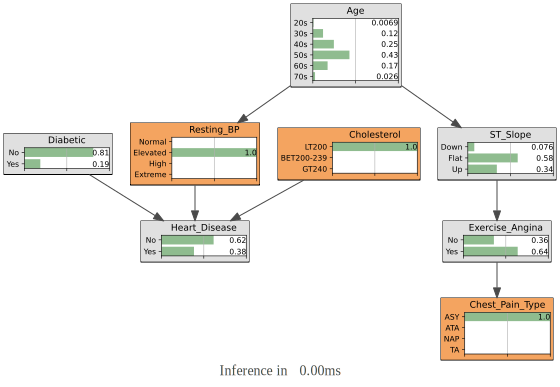

In [387]:
gnb.showInference(bn,evs={'Chest_Pain_Type':'ASY', 'Resting_BP':'Elevated', 'Cholesterol':'LT200'}, engine=ve)

In [388]:
ve.posterior('Heart_Disease')[0]

0.615708310218

In [389]:
#Save Bayesian Network 
gum.saveBN(bn, "BayesianNetwork.bif")

In [390]:
#Build Decision Network
dn = gum.InfluenceDiagram()

In [391]:
#Add nodes
HD = dn.add(gum.LabelizedVariable('Heart_Disease','Heart_Disease',0).addLabel('No').addLabel('Yes'))
CPT = dn.add(gum.LabelizedVariable('Chest_Pain_Type','Chest_Pain_Type',0).addLabel('ASY').addLabel('ATA').addLabel('NAP').addLabel('TA'))
STSlope = dn.add(gum.LabelizedVariable('ST_Slope','Slope of peak exercise ST segment',0).addLabel("Down").addLabel("Flat").addLabel("Up"))
diabetic = dn.add(gum.LabelizedVariable('Diabetic','Fasting Blood Sugar',0).addLabel("No").addLabel("Yes"))
ExAngina = dn.add(gum.LabelizedVariable('Exercise_Angina','Exercise induce Angina',0).addLabel("No").addLabel("Yes"))
age = dn.add(gum.LabelizedVariable('Age','Patient Age Range in Years',0).addLabel("20s").addLabel("30s").addLabel("40s").addLabel("50s").addLabel("60s").addLabel("70s"))
RBP = dn.add(gum.LabelizedVariable('Resting_BP','Resting blood pressure',0).addLabel("Normal").addLabel("Elevated").addLabel("High").addLabel("Extreme"))
cholesterol = dn.add(gum.LabelizedVariable('Cholesterol','Cholesterol Categories',0).addLabel("LT200").addLabel("BET200-239").addLabel("GT240"))

In [392]:
#Add Arcs
dn.addArc(cholesterol,HD)
dn.addArc(diabetic,HD)
dn.addArc(age,RBP)
dn.addArc(age,STSlope)
dn.addArc(STSlope,ExAngina)
dn.addArc(ExAngina,CPT)
dn.addArc(RBP,HD)

In [393]:
#Add utility and action nodes and arcs
u = dn.addUtilityNode(gum.LabelizedVariable("U","Utility", 1))
action = dn.addDecisionNode(gum.LabelizedVariable("Intervene", "Medical Intervention",2))

dn.addArc(HD,u)
dn.addArc(action,u)

In [394]:
#Building Conditional Probability Table
dn.cpt(age).fillWith([0.007092,0.086879,0.246454,0.413121,0.210993,0.035461])
dn.cpt(STSlope)[:]=[[0.100000,0.250000,0.650000],[0.040816,0.346939,0.612245],[0.028777,	0.424460,	0.546763],[0.064378,	0.510730,	0.424893],[0.092437,	0.655462,	0.252101],[0.300000,	0.550000,	0.150000]]
dn.cpt(RBP)[:]=[[0.5,	0.250000,	0.125000,	0.125000],[0.285714,	0.346939,	0.163265,	0.204082],[0.223022,	0.244604,	0.237410,	0.294964],[0.103004,	0.240343,	0.248927,	0.407725],[0.100840,	0.176471,	0.235294,	0.487395],[0.050000,	0.150000,	0.150000,	0.650000]]
dn.cpt(CPT)[:]=[[0.340694,	0.302839,	0.274448,	0.082019],[0.809717,	0.044534,	0.121457,	0.024291]]
dn.cpt(ExAngina)[:]=[[0.315789,	0.684211],[0.348592,	0.651408],[0.851240,	0.148760]]
dn.cpt(diabetic).fillWith([0.812057, 0.187943])
dn.cpt(cholesterol).fillWith([0.203901,	0.342199,	0.453901])
dn.cpt(HD)[:]=[[[[0.750000,	0.250000],[0.620690,	0.379310],[0.354839,	0.645161]],[[0.673000,	0.327000],[0.550800,	0.449200],[0.250000,	0.750000]]],[[[0.629630,	0.370370],[0.529412,	0.470588],[0.436364,	0.563636]],[[0.555556,  0.444444],[0.444444,	0.555556],[0.428571,	0.571429]]],[[[0.608696,	0.391304],[0.571429,	0.428571],[0.500000,	0.500000]],[[0.400000,	0.600000],[0.222222,	0.777778],[0.200000,	0.800000]]],[[[0.529412,	0.470588],[0.360000,	0.640000],[0.362500,	0.637500]],[[0.444444,	0.555556],[0.312500,	0.687500],[0.206897,	0.793103]]]]

In [395]:
dn.cpt(HD)

(pyAgrum.Potential<double>@000001A8D376C800) 
                    ||  Heart_Disease    |
Choles|Diabet|Restin||No       |Yes      |
------|------|------||---------|---------|
LT200 |No    |Normal|| 0.7500  | 0.2500  |
BET200|No    |Normal|| 0.6207  | 0.3793  |
GT240 |No    |Normal|| 0.3548  | 0.6452  |
LT200 |Yes   |Normal|| 0.6730  | 0.3270  |
BET200|Yes   |Normal|| 0.5508  | 0.4492  |
GT240 |Yes   |Normal|| 0.2500  | 0.7500  |
[...12 more line(s) ...]
LT200 |No    |Extrem|| 0.5294  | 0.4706  |
BET200|No    |Extrem|| 0.3600  | 0.6400  |
GT240 |No    |Extrem|| 0.3625  | 0.6375  |
LT200 |Yes   |Extrem|| 0.4444  | 0.5556  |
BET200|Yes   |Extrem|| 0.3125  | 0.6875  |
GT240 |Yes   |Extrem|| 0.2069  | 0.7931  |

In [396]:
#Add utility weights
dn.utility(u)[{'Heart_Disease':'No', 'Intervene':0}] = 100
dn.utility(u)[{'Heart_Disease':'No', 'Intervene':1}] = -100
dn.utility(u)[{'Heart_Disease':'Yes', 'Intervene':0}] = -100
dn.utility(u)[{'Heart_Disease':'Yes', 'Intervene':1}] = 100

In [397]:
dn.utility(u)

(pyAgrum.Potential<double>@000001A8CF2247C0) 
             ||  U      |
Heart_|Interv||0        |
------|------||---------|
No    |0     || 100.0000|
Yes   |0     || -100.0000|
No    |1     || -100.0000|
Yes   |1     || 100.0000|

In [398]:
#Making Inference
ie = gum.ShaferShenoyLIMIDInference(dn)
ie.setEvidence({'Age': '20s', 'ST_Slope': "Down"})
ie.makeInference()

In [399]:
ie.posteriorUtility("Intervene")

(pyAgrum.Potential<double>@000001A8D009B4F8) 
  Intervene        |
0        |1        |
---------|---------|
 -2.4018 | 2.4018  |

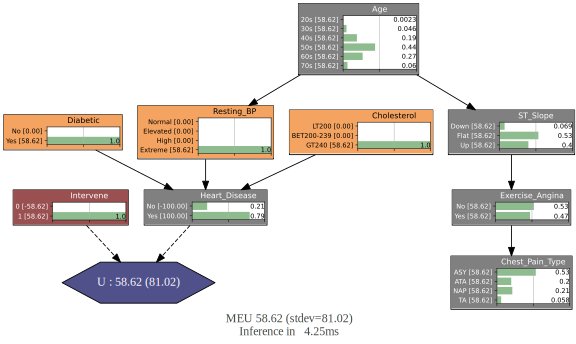

In [400]:
gnb.showInference(dn, evs={'Diabetic': "Yes", 'Cholesterol': 'GT240', 'Resting_BP' : 'Extreme'})

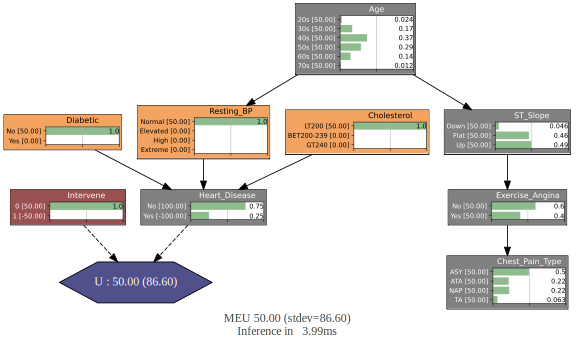

In [401]:
gnb.showInference(dn, evs={'Diabetic': "No", 'Cholesterol': 'LT200', 'Resting_BP' : 'Normal'})

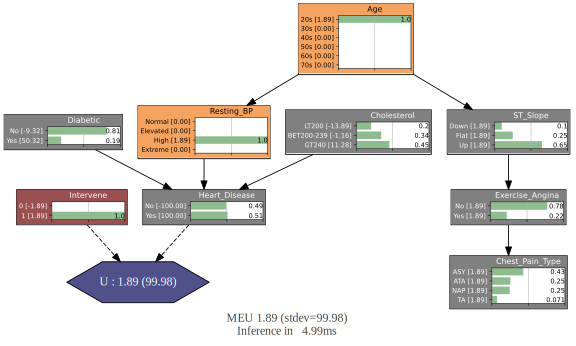

In [402]:
gnb.showInference(dn, evs={'Age': "20s", 'Resting_BP': 'High'})

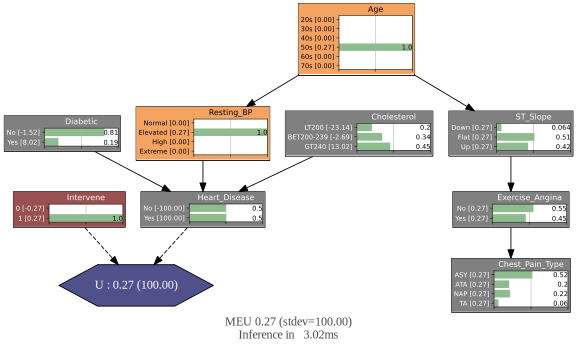

In [403]:
gnb.showInference(dn, evs={'Age': "50s", 'Resting_BP': 'Elevated'})

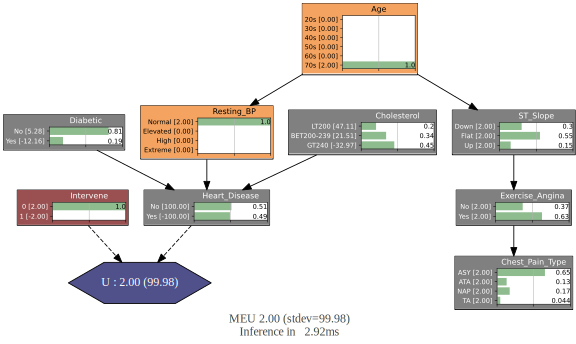

In [404]:
gnb.showInference(dn, evs={'Age': "70s", 'Resting_BP': 'Normal'})

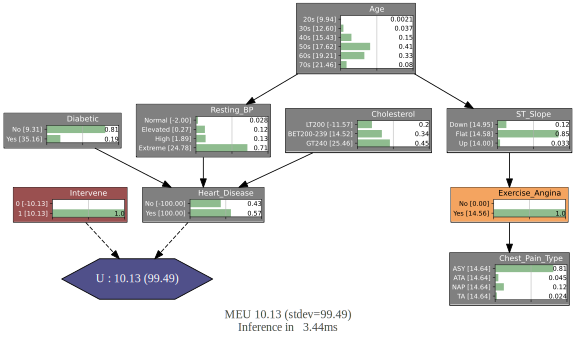

In [405]:
gnb.showInference(dn, evs={'Exercise_Angina': 'Yes'})